In [1]:
#Лабораторная 1: По статистике приюта для животных будем угадывать в течение какого периода времени забирают животных из приюта.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from pandas.plotting import scatter_matrix

In [4]:
data = pd.read_csv('austin-animal-center-shelter-outcomes-and/aac_shelter_cat_outcome_eng.csv', engine = 'python')

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,...,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,...,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,...,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,...,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,...,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


In [7]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


In [8]:
print(data.shape)
print(data.columns)

(29421, 37)
Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=29421, step=1)

In [10]:
data[['name', 'age_upon_outcome']].head()

,name,age_upon_outcome
0,NaN,2 weeks
1,Lucy,1 month
2,*Frida,3 months
3,Stella Luna,1 year
4,NaN,3 weeks


In [11]:
data = data.drop('animal_type', axis = 1)\
            .drop('animal_id', axis = 1)\
            .drop('breed', axis = 1)\
            .drop('count', axis = 1)\
            .drop('color', axis = 1)\
            .drop('date_of_birth', axis = 1)\
            .drop('datetime', axis = 1)\
            .drop('monthyear', axis = 1)\
            .drop('name', axis = 1)\
            .drop('outcome_subtype', axis = 1)\
            .drop('outcome_type', axis = 1) \
            .drop('Cat/Kitten (outcome)', axis = 1)\
            .drop('dob_monthyear', axis = 1)\
            .drop('dob_month', axis = 1)\
            .drop('outcome_month', axis = 1)\
            .drop('outcome_year', axis = 1)\
            .drop('outcome_weekday', axis = 1)\
            .drop('outcome_hour', axis = 1)\
            .drop('sex_upon_outcome', axis = 1)\
            .drop('Spay/Neuter', axis = 1)\
            .drop('sex_age_outcome', axis = 1)\
            .drop('breed2', axis = 1)\
            .drop('coat_pattern', axis = 1) \
            .drop('color2', axis = 1)\
            .drop('cfa_breed', axis = 1)\
            .drop('age_group', axis = 1)\
            .drop('color1', axis = 1)\
            .drop('coat', axis = 1)\
            .drop('breed1', axis = 1)\
            .drop('Period Range', axis = 1)\
            .drop('Periods', axis = 1)\
            .drop('domestic_breed', axis = 1)

In [12]:
print(data.head())

  age_upon_outcome     sex  outcome_age_(days)  outcome_age_(years)  dob_year
0          2 weeks    Male                  14             0.038356      2014
1          1 month  Female                  30             0.082192      2014
2         3 months  Female                  90             0.246575      2014
3           1 year  Female                 365             1.000000      2013
4          3 weeks    Male                  21             0.057534      2013


In [13]:
data.describe()

,outcome_age_(days),outcome_age_(years),dob_year
count,29421.000000,29421.000000,29421.000000
mean,509.446280,1.395743,2013.982428
std,966.810609,2.648796,2.965574
min,0.000000,0.000000,1992.000000
25%,60.000000,0.164384,2013.000000
50%,90.000000,0.246575,2015.000000
75%,365.000000,1.000000,2016.000000
max,8030.000000,22.000000,2017.000000


In [14]:
for c in data.columns:
    print(c)
    print(data[c].unique()) 

age_upon_outcome
['2 weeks' '1 month' '3 months' '1 year' '3 weeks' '2 months' '8 months'
 '5 months' '3 years' '4 years' '2 years' '7 years' '4 weeks' '6 years'
 '4 months' '8 years' '10 years' '15 years' '10 months' '11 months'
 '6 months' '16 years' '9 months' '3 days' '6 days' '11 years' '5 weeks'
 '1 week' '5 years' '2 days' '7 months' '5 days' '9 years' '14 years'
 '13 years' '1 day' '1 weeks' '4 days' '12 years' '0 years' '17 years'
 '20 years' '18 years' '19 years' '22 years']
sex
['Male' 'Female']
outcome_age_(days)
[  14   30   90  365   21   60  240  150 1095 1460  730 2555   28 2190
  120 2920 3650 5475  300  330  180 5840  270    3    6 4015   35    7
 1825    2  210    5 3285 5110 4745    1    4 4380    0 6205 7300 6570
 6935 8030]
outcome_age_(years)
[3.83561644e-02 8.21917808e-02 2.46575342e-01 1.00000000e+00
 5.75342466e-02 1.64383562e-01 6.57534247e-01 4.10958904e-01
 3.00000000e+00 4.00000000e+00 2.00000000e+00 7.00000000e+00
 7.67123288e-02 6.00000000e+00 3.28767123

In [15]:
#Выделим категориальные и числовые столбцы

In [16]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [17]:
for c in categorical_columns:
    print(c, data[c].unique())

age_upon_outcome ['2 weeks' '1 month' '3 months' '1 year' '3 weeks' '2 months' '8 months'
 '5 months' '3 years' '4 years' '2 years' '7 years' '4 weeks' '6 years'
 '4 months' '8 years' '10 years' '15 years' '10 months' '11 months'
 '6 months' '16 years' '9 months' '3 days' '6 days' '11 years' '5 weeks'
 '1 week' '5 years' '2 days' '7 months' '5 days' '9 years' '14 years'
 '13 years' '1 day' '1 weeks' '4 days' '12 years' '0 years' '17 years'
 '20 years' '18 years' '19 years' '22 years']
sex ['Male' 'Female']


In [18]:
data[categorical_columns].count(axis = 0)

age_upon_outcome    29421
sex                 29421
dtype: int64

In [19]:
data[numerical_columns].count(axis = 0)

outcome_age_(days)     29421
outcome_age_(years)    29421
dob_year               29421
dtype: int64

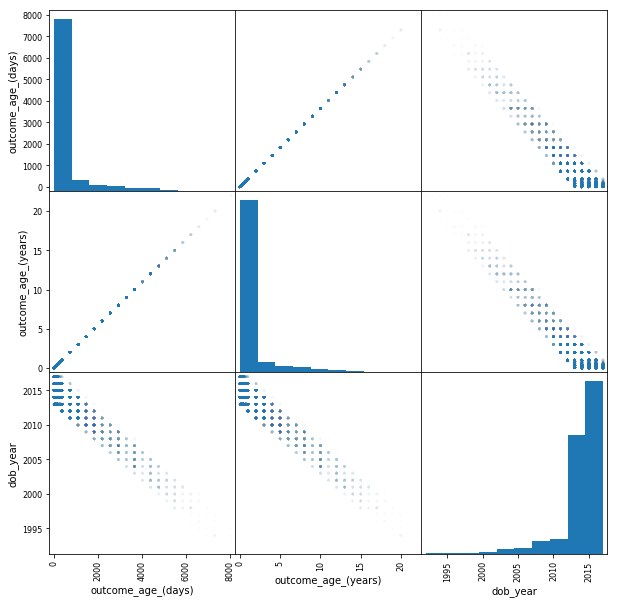

In [20]:
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

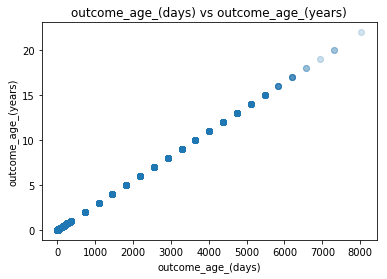

In [21]:
plt.plot(data['outcome_age_(days)'], data['outcome_age_(years)'], 'o', alpha = 0.05)
plt.xlabel('outcome_age_(days)')
plt.ylabel('outcome_age_(years)')
plt.title('outcome_age_(days) vs outcome_age_(years)')
pass

In [22]:
data.corr()

,outcome_age_(days),outcome_age_(years),dob_year
outcome_age_(days),1.000000,1.000000,-0.908309
outcome_age_(years),1.000000,1.000000,-0.908309
dob_year,-0.908309,-0.908309,1.000000


In [23]:
data.head()

,age_upon_outcome,sex,outcome_age_(days),outcome_age_(years),dob_year
0,2 weeks,Male,14,0.038356,2014
1,1 month,Female,30,0.082192,2014
2,3 months,Female,90,0.246575,2014
3,1 year,Female,365,1.000000,2013
4,3 weeks,Male,21,0.057534,2013


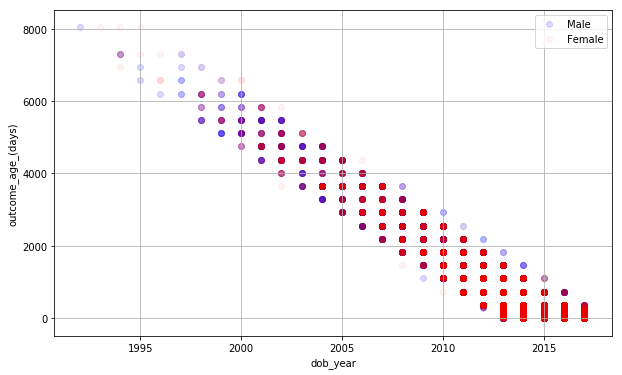

In [24]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['sex'] == 'Male']['dob_year'],
            data[data['sex'] == 'Male']['outcome_age_(days)'],
            alpha = 0.15,
            label = 'Male',
            color = 'b')

plt.scatter(data[data['sex'] == 'Female']['dob_year'],
            data[data['sex'] == 'Female']['outcome_age_(days)'],
            alpha = 0.05,
            label = 'Female',
            color = 'r')

plt.xlabel('dob_year')
plt.ylabel('outcome_age_(days)')
plt.legend()
plt.grid()

In [25]:
#Обрабатываем пропущенные значения

In [26]:
data.describe(include = ['object'])

,age_upon_outcome,sex
count,29421,29421
unique,45,2
top,2 months,Female
freq,5935,16195


In [27]:
data.describe(include = 'all')

,age_upon_outcome,sex,outcome_age_(days),outcome_age_(years),dob_year
count,29421,29421,29421.000000,29421.000000,29421.000000
unique,45,2,NaN,NaN,NaN
top,2 months,Female,NaN,NaN,NaN
freq,5935,16195,NaN,NaN,NaN
mean,NaN,NaN,509.446280,1.395743,2013.982428
std,NaN,NaN,966.810609,2.648796,2.965574
min,NaN,NaN,0.000000,0.000000,1992.000000
25%,NaN,NaN,60.000000,0.164384,2013.000000
50%,NaN,NaN,90.000000,0.246575,2015.000000
75%,NaN,NaN,365.000000,1.000000,2016.000000


In [28]:
data.median(axis = 0)

outcome_age_(days)       90.000000
outcome_age_(years)       0.246575
dob_year               2015.000000
dtype: float64

In [29]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [30]:
data[numerical_columns].count(axis = 0)

outcome_age_(days)     29421
outcome_age_(years)    29421
dob_year               29421
dtype: int64

In [31]:
data[categorical_columns].count(axis = 0)

age_upon_outcome    29421
sex                 29421
dtype: int64

In [32]:
data['age_upon_outcome'].describe()

count        29421
unique          45
top       2 months
freq          5935
Name: age_upon_outcome, dtype: object

In [33]:
type(data['age_upon_outcome'].describe())

pandas.core.series.Series

In [34]:
data['age_upon_outcome'].describe().top

'2 months'

In [35]:
data['age_upon_outcome'] = data['age_upon_outcome'].fillna('2 months')

In [36]:
data.describe(include = [object])

,age_upon_outcome,sex
count,29421,29421
unique,45,2
top,2 months,Female
freq,5935,16195


In [37]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [38]:
#Векторизация

In [39]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex'] ['age_upon_outcome']


In [40]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
data.at[data['sex'] == 'Male', 'sex'] = 0
data.at[data['sex'] == 'Female', 'sex'] = 1
data['sex'].describe()

count    29421.000000
mean         0.550457
std          0.497456
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

In [42]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['age_upon_outcome_0 years', 'age_upon_outcome_1 day',
       'age_upon_outcome_1 month', 'age_upon_outcome_1 week',
       'age_upon_outcome_1 weeks', 'age_upon_outcome_1 year',
       'age_upon_outcome_10 months', 'age_upon_outcome_10 years',
       'age_upon_outcome_11 months', 'age_upon_outcome_11 years',
       'age_upon_outcome_12 years', 'age_upon_outcome_13 years',
       'age_upon_outcome_14 years', 'age_upon_outcome_15 years',
       'age_upon_outcome_16 years', 'age_upon_outcome_17 years',
       'age_upon_outcome_18 years', 'age_upon_outcome_19 years',
       'age_upon_outcome_2 days', 'age_upon_outcome_2 months',
       'age_upon_outcome_2 weeks', 'age_upon_outcome_2 years',
       'age_upon_outcome_20 years', 'age_upon_outcome_22 years',
       'age_upon_outcome_3 days', 'age_upon_outcome_3 months',
       'age_upon_outcome_3 weeks', 'age_upon_outcome_3 years',
       'age_upon_outcome_4 days', 'age_upon_outcome_4 months',
       'age_upon_outcome_4 weeks', 'age_upo

In [43]:
#Нормализация

In [44]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,outcome_age_(days),outcome_age_(years),dob_year
count,29421.000000,29421.000000,29421.000000
mean,509.446280,1.395743,2013.982428
std,966.810609,2.648796,2.965574
min,0.000000,0.000000,1992.000000
25%,60.000000,0.164384,2013.000000
50%,90.000000,0.246575,2015.000000
75%,365.000000,1.000000,2016.000000
max,8030.000000,22.000000,2017.000000


In [45]:
Days_in_shelter = data_numerical['outcome_age_(days)']
data_numerical = data_numerical.drop('outcome_age_(days)', 1)
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical = data_numerical.assign(Days_in_shelter=Days_in_shelter.values)
data_numerical.describe()

,outcome_age_(years),dob_year,Days_in_shelter
count,2.942100e+04,2.942100e+04,29421.000000
mean,5.849033e-14,4.583681e-14,509.446280
std,1.000000e+00,1.000000e+00,966.810609
min,-5.269349e-01,-7.412538e+00,0.000000
25%,-4.648752e-01,-3.312774e-01,60.000000
50%,-4.338453e-01,3.431284e-01,90.000000
75%,-1.494049e-01,6.803313e-01,365.000000
max,7.778725e+00,1.017534e+00,8030.000000


In [46]:
#Объединим в одну таблицу

In [47]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(29421, 49)


In [48]:
data.describe()

,outcome_age_(years),dob_year,Days_in_shelter,age_upon_outcome_0 years,age_upon_outcome_1 day,age_upon_outcome_1 month,age_upon_outcome_1 week,age_upon_outcome_1 weeks,age_upon_outcome_1 year,age_upon_outcome_10 months,...,age_upon_outcome_6 days,age_upon_outcome_6 months,age_upon_outcome_6 years,age_upon_outcome_7 months,age_upon_outcome_7 years,age_upon_outcome_8 months,age_upon_outcome_8 years,age_upon_outcome_9 months,age_upon_outcome_9 years,sex
count,2.942100e+04,2.942100e+04,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,...,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,5.849033e-14,4.583681e-14,509.446280,0.001699,0.003467,0.068455,0.012712,0.014004,0.118045,0.008837,...,0.003807,0.020937,0.012202,0.011081,0.011182,0.011047,0.013426,0.005404,0.005676,0.550457
std,1.000000e+00,1.000000e+00,966.810609,0.041190,0.058779,0.252529,0.112031,0.117507,0.322667,0.093592,...,0.061583,0.143177,0.109789,0.104681,0.105156,0.104522,0.115091,0.073316,0.075128,0.497456
min,-5.269349e-01,-7.412538e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.648752e-01,-3.312774e-01,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.338453e-01,3.431284e-01,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,-1.494049e-01,6.803313e-01,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7.778725e+00,1.017534e+00,8030.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#Обучающая и тестовая выборки

In [50]:
X = data.drop(('Days_in_shelter'), axis = 1)
y = data['Days_in_shelter']
feature_names = X.columns

In [51]:
type(feature_names)

pandas.core.indexes.base.Index

In [52]:
feature_names

Index(['outcome_age_(years)', 'dob_year', 'age_upon_outcome_0 years',
       'age_upon_outcome_1 day', 'age_upon_outcome_1 month',
       'age_upon_outcome_1 week', 'age_upon_outcome_1 weeks',
       'age_upon_outcome_1 year', 'age_upon_outcome_10 months',
       'age_upon_outcome_10 years', 'age_upon_outcome_11 months',
       'age_upon_outcome_11 years', 'age_upon_outcome_12 years',
       'age_upon_outcome_13 years', 'age_upon_outcome_14 years',
       'age_upon_outcome_15 years', 'age_upon_outcome_16 years',
       'age_upon_outcome_17 years', 'age_upon_outcome_18 years',
       'age_upon_outcome_19 years', 'age_upon_outcome_2 days',
       'age_upon_outcome_2 months', 'age_upon_outcome_2 weeks',
       'age_upon_outcome_2 years', 'age_upon_outcome_20 years',
       'age_upon_outcome_22 years', 'age_upon_outcome_3 days',
       'age_upon_outcome_3 months', 'age_upon_outcome_3 weeks',
       'age_upon_outcome_3 years', 'age_upon_outcome_4 days',
       'age_upon_outcome_4 months', '

In [53]:
print(X.shape)
print(y.shape)
N, d = X.shape

(29421, 48)
(29421,)


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

20594 8827


In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [56]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
print(err_train > err_test)

0.00024278916189181314 0.0004531550923303501
False


In [57]:
#Ошибка на тествой выборке больше ошибки на обучающей -> возникло переобучение. Подберем параметр n_neighbors, такой,
#чтобы переобучения не было

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
print(err_train > err_test)

9.711566475672526e-05 0.0
True


In [60]:
#Добились примерно одинакового значения ошибки. Переобучения нет.

In [61]:
#Лабораторная работа 2: попробуем обучить классификатор

In [62]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
#Проверяем качество классификатора

In [64]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.052053996309604736 0.051886258071825085


In [65]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.9479460036903953 0.9481137419281749


In [66]:
#Подбор гиперпараметров. Подберем оптимальное значение параметра регуляризации alpha

In [67]:
alpha_arr = np.logspace(-3, 1, 40)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

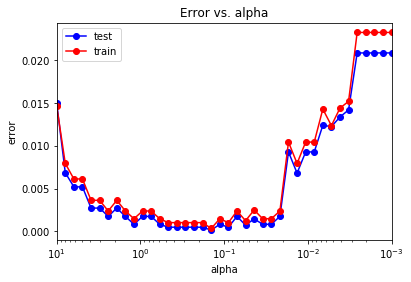

In [68]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [69]:
#Минимальное значение ошибки

In [70]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0001456734971350879 0.00033986631924776253


In [71]:
#Оптимальные значениях альфа
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.14251027]


In [72]:
alpha_opt = alpha_opt[0]

In [73]:
#Классификатор при найденном оптимальном значении alpha:
#Повторим обучение:

mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (20,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0001456734971350879
0.00033986631924776253


In [74]:
#Матрица рассогласования:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 8  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  3  6]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        38
          2       1.00      1.00      1.00        44
          3       1.00      1.00      1.00        68
          4       1.00      1.00      1.00        31
          5       1.00      1.00      1.00        26
          6       1.00      1.00      1.00        31
          7       1.00      1.00      1.00       238
         14       1.00      1.00      1.00       347
         21       1.00      1.00      1.00       423
         28       1.00      1.00      1.00       216
         30       1.00      1.00      1.00       605
         35       1.00      1.00      1.00        16
         60       1.00      1.00      1.00      1779
         90       1.00      1.00      1.00       729
        120       1.00      1.00      1.00       425
        150       1.00      1.00      1.00       193
        180       1.00      1.00      1.00   

C:\Users\Julia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
#Сеть прогнозирует, что животное заберут через месяц из приюта

In [77]:
#Лабораторная работа 3: Random forests, extremely random forests, adaboost, gradient boosted trees

In [83]:
#Random forests
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 2)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

9.711566475672526e-05 0.00022657754616517504


In [84]:
np.sum(rf.feature_importances_)


1.0

In [85]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'outcome_age_(years)' (0.205715)
 2. feature 'age_upon_outcome_1 year' (0.123047)
 3. feature 'age_upon_outcome_3 months' (0.084688)
 4. feature 'age_upon_outcome_2 months' (0.069315)
 5. feature 'age_upon_outcome_1 month' (0.060811)
 6. feature 'age_upon_outcome_2 years' (0.055704)
 7. feature 'age_upon_outcome_4 months' (0.053325)
 8. feature 'age_upon_outcome_2 weeks' (0.042748)
 9. feature 'age_upon_outcome_5 months' (0.031355)
10. feature 'dob_year' (0.029821)
11. feature 'age_upon_outcome_4 weeks' (0.029725)
12. feature 'age_upon_outcome_6 months' (0.028019)
13. feature 'age_upon_outcome_3 years' (0.023081)
14. feature 'age_upon_outcome_4 years' (0.022780)
15. feature 'age_upon_outcome_8 years' (0.013658)
16. feature 'age_upon_outcome_7 months' (0.011947)
17. feature 'age_upon_outcome_8 months' (0.011566)
18. feature 'age_upon_outcome_5 years' (0.010722)
19. feature 'age_upon_outcome_10 years' (0.009329)
20. feature 'age_upon_outcome_3 days' (0.008061

In [86]:
feature_names[[1,0,1]]

Index(['dob_year', 'outcome_age_(years)', 'dob_year'], dtype='object')

(-1, 20)

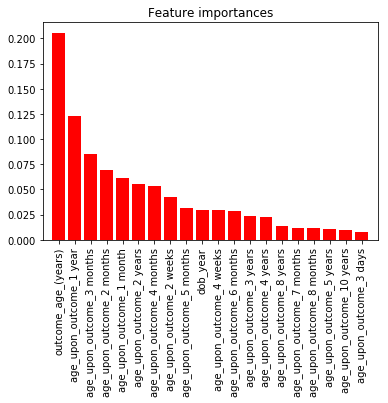

In [87]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [91]:
#Extremely random forests
ert = ensemble.ExtraTreesClassifier(n_estimators = 1).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.00011328877308258752


In [92]:
#Adaboost
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.3018354860639021 0.3070125750538122


In [97]:
#Gradient boosted trees
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.0
